In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

%matplotlib inline


### Create a classification model to predict those who will likely accept the offer of a new personal loan , by analyzing the previous historical campaign's customer behaviour data.

- Age	Customer's age in completed years							
- Experience	#years of professional experience							
- Income	Annual income of the customer 						
- Family	Family size of the customer					
- CCAvg	Avg. spending on credit cards per month 						
- Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
- Mortgage	Value of house mortgage if any. 							
- Securities Account	Does the customer have a securities account with the bank?							
- CD Account	Does the customer have a certificate of deposit (CD) account with the bank?							
- Online	Does the customer use internet banking facilities							
- CreditCard	Does the customer use a credit card issued by Bank?							
- Offer_acceptance	Did this customer accept the personal loan offered in the last campaign?							


In [3]:
import pandas as pd

In [4]:
input_data = pd.read_excel('Target_Customer_Prediction.xlsx')

In [5]:
input_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Offer_acceptance
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,1


In [69]:
labels = list(input_data.columns.values)
# types = list(type(input_data.columns.values))

input_types = [(label, type(input_data[label][0])) for label in labels]

input_types

TypeError: 'type' object is not iterable

In [6]:
input_data.shape

(5000, 12)

In [7]:
x = input_data.drop(['Offer_acceptance'], axis=1)
y = input_data['Offer_acceptance']

In [8]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3 )

In [10]:
from sklearn import tree 
ctree = tree.DecisionTreeClassifier()
ctree.fit(x_train, y_train)
y_pred = ctree.predict(x_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8173333333333334


In [11]:
comp_df = pd.DataFrame()
comp_df['Class_actual'] = y_test
comp_df['Class_predicted'] = y_pred
comp_df.head(5)

,Class_actual,Class_predicted
1377,0,0
355,0,0
737,1,1
3306,0,0
4324,0,0


In [12]:
y_test.value_counts(normalize=True)

Offer_acceptance
0    0.816
1    0.184
Name: proportion, dtype: float64

In [13]:
ctree.feature_importances_

array([0.10859326, 0.07987022, 0.26851387, 0.10546033, 0.12016306,
       0.1916872 , 0.07068157, 0.01003253, 0.01270489, 0.02626626,
       0.00602682])

In [14]:
temp_imp = pd.DataFrame()
temp_imp['col'] = x.columns
temp_imp['imp'] = ctree.feature_importances_*100

temp_imp

,col,imp
0,Age,10.859326
1,Experience,7.987022
2,Income,26.851387
3,Family,10.546033
4,CCAvg,12.016306
5,Education,19.168720
6,Mortgage,7.068157
7,Securities Account,1.003253
8,CD Account,1.270489
9,Online,2.626626


In [15]:
temp_imp.sort_values('imp', ascending=False)

,col,imp
2,Income,26.851387
5,Education,19.168720
4,CCAvg,12.016306
0,Age,10.859326
3,Family,10.546033
1,Experience,7.987022
6,Mortgage,7.068157
9,Online,2.626626
8,CD Account,1.270489
7,Securities Account,1.003253


#### Model Hyperparameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = { "criterion"      : ['gini', 'entropy'],    
               "max_features"   : [2, 3, 4, 5, 6, 7 ],             
               "splitter"       : ['best', 'random'],  
               "min_samples_split"  : [3, 5, 10 ],
               "max_depth"          : [2,3,4,5] ,
               "class_weight"      : [{0:1, 1:2}, {0:1, 1:5}]
               }



In [18]:
ctree_model = tree.DecisionTreeClassifier()

In [19]:
#optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'accuracy', cv = 5, verbose=3)
optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'recall', cv = 5, verbose=3)

In [20]:
optimized_tree.fit(x_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best;, score=0.535 total time=   0.0s
[CV 2/5] END class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best;, score=0.000 total time=   0.0s
[CV 3/5] END class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best;, score=0.150 total time=   0.0s
[CV 4/5] END class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best;, score=0.378 total time=   0.0s
[CV 5/5] END class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best;, score=0.000 total time=   0.0s
[CV 1/5] END class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=random;, score=0.000 total time=   0.0s
[CV 2/5] END cla

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=3)

In [21]:
optimized_tree.best_params_

{'class_weight': {0: 1, 1: 5},
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 2,
 'min_samples_split': 3,
 'splitter': 'random'}

In [22]:
optimized_tree.best_estimator_

DecisionTreeClassifier(class_weight={0: 1, 1: 5}, max_depth=2, max_features=2,
                       min_samples_split=3, splitter='random')

In [23]:
optimized_tree.best_score_

0.8771653543307087

In [24]:
#optimized_tree.cv_results_

In [25]:
ctree_final = optimized_tree.best_estimator_

y_pred = ctree_final.predict(x_test)
metrics.accuracy_score(y_test, y_pred) 

0.8166666666666667

In [26]:
y_pred_prob = ctree_final.predict_proba(x_test)
cust_likelihood = y_pred_prob[ :,  1]*100
cust_likelihood

array([42.16315307, 42.16315307, 42.16315307, ..., 42.16315307,
       88.05031447, 42.16315307])

In [27]:
comp_df = x_test.copy()
comp_df['actual'] = y_test
comp_df['predicted'] = y_pred
comp_df['propensity'] = cust_likelihood
 
comp_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,actual,predicted,propensity
1377,27,3,109,2,2.5,1,0,0,0,1,0,0,0,42.163153
355,43,19,71,3,0.3,3,0,0,0,0,1,0,0,42.163153
737,64,37,138,2,2.8,2,0,0,0,1,0,1,0,42.163153
3306,47,22,65,1,2.4,1,0,0,0,1,0,0,0,42.163153
4324,49,24,13,4,0.8,1,111,0,0,1,0,0,0,42.163153


In [28]:
metrics.recall_score(y_test, y_pred)

0.4855072463768116

In [29]:
metrics.precision_score(y_test, y_pred)

0.50187265917603

In [30]:
y_test.value_counts()

Offer_acceptance
0    1224
1     276
Name: count, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test, y_pred)

array([[1091,  133],
       [ 142,  134]])

In [33]:
metrics.recall_score(y_test, y_pred)

0.4855072463768116

In [34]:
metrics.precision_score(y_test, y_pred)

0.50187265917603

#### Model Predicted Probability

In [35]:
x_test.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1377,27,3,109,2,2.5,1,0,0,0,1,0
355,43,19,71,3,0.3,3,0,0,0,0,1
737,64,37,138,2,2.8,2,0,0,0,1,0
3306,47,22,65,1,2.4,1,0,0,0,1,0
4324,49,24,13,4,0.8,1,111,0,0,1,0


In [36]:
y_pred_prob = ctree_final.predict_proba(x_test)
y_pred_prob

array([[0.57836847, 0.42163153],
       [0.57836847, 0.42163153],
       [0.57836847, 0.42163153],
       ...,
       [0.57836847, 0.42163153],
       [0.11949686, 0.88050314],
       [0.57836847, 0.42163153]])

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = { "criterion"      : ['gini', 'entropy'],    
               "max_features"   : [2, 3, 4, 5, 6, 7 ],             
               "splitter"       : ['best', 'random'],  
               "min_samples_split"  : [3, 5, 10 ],
               "max_depth"          : [2,3,4,5] 
#               "class_weight"      : [{0:1, 1:2}, {0:1, 1:5}]
               }
ctree_model = tree.DecisionTreeClassifier()
optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'accuracy', cv=5) 
optimized_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [38]:
ctree_final = optimized_tree.best_estimator_
y_pred = ctree_final.predict(x_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred) )
print('Sensitivity :', metrics.recall_score(y_test, y_pred))
print('Precision :', metrics.precision_score(y_test, y_pred))

Accuracy : 0.8833333333333333
Sensitivity : 0.427536231884058
Precision : 0.8740740740740741


In [39]:
y_pred_prob = ctree_final.predict_proba(x_test)
y_pred_prob

array([[0.87096774, 0.12903226],
       [0.92631579, 0.07368421],
       [0.68217054, 0.31782946],
       ...,
       [0.54545455, 0.45454545],
       [0.        , 1.        ],
       [0.92631579, 0.07368421]])

In [40]:
# prediction class based on default threshold prob = 0.5
df_prediction = x_test.copy()
df_prediction['actual_class'] = y_test
df_prediction['pred_class'] = y_pred
df_prediction['prob_1'] = y_pred_prob[:,1]
df_prediction.head(25)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,actual_class,pred_class,prob_1
1377,27,3,109,2,2.500000,1,0,0,0,1,0,0,0,0.129032
355,43,19,71,3,0.300000,3,0,0,0,0,1,0,0,0.073684
737,64,37,138,2,2.800000,2,0,0,0,1,0,1,0,0.317829
3306,47,22,65,1,2.400000,1,0,0,0,1,0,0,0,0.110617
4324,49,24,13,4,0.800000,1,111,0,0,1,0,0,0,0.110617
4394,57,31,25,2,0.700000,2,103,0,0,0,0,0,0,0.110617
2592,57,32,69,4,0.700000,1,245,0,0,0,0,0,0,0.110617
1340,35,11,82,4,3.400000,1,0,0,0,0,0,0,0,0.166124
889,24,-2,82,2,1.600000,3,0,0,0,1,1,0,0,0.073684
3255,34,7,82,4,2.000000,2,0,0,0,1,1,0,0,0.073684


### ROC Curver and Area under Curve (AUC) : 
- Provide the sensitivity and specificity values for differrent threshold values without actually changing the threshold.
- ROC will help to choosing the threshold that balance the sensitivity and specificity

In [41]:
print(metrics.roc_auc_score(y_test, y_pred))

0.7068236714975846


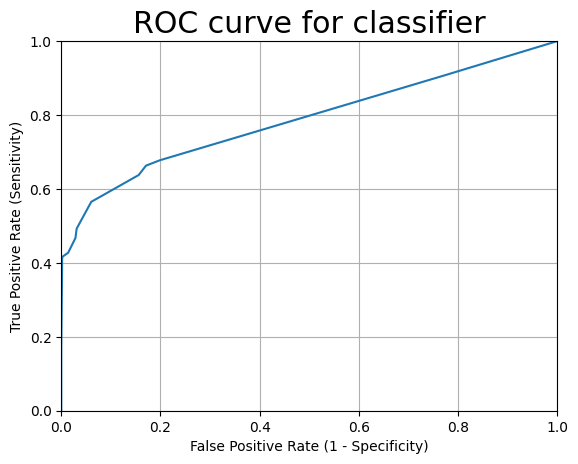

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 18
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- AUC is the percentage of the ROC plot that is underneath the curve:
- AUC is useful as a single number summary of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will   
   assign a higher predicted probability to the positive observation.

In [43]:
df_threshold = pd.DataFrame()
df_threshold['tpr'] = tpr
df_threshold['fpr'] = fpr
df_threshold['prob'] = thresholds  # probability(1)
df_threshold

,tpr,fpr,prob
0,0.000000,0.000000,inf
1,0.170290,0.000000,1.000000
2,0.380435,0.001634,0.902985
3,0.409420,0.001634,0.875000
4,0.416667,0.002451,0.750000
5,0.427536,0.013889,0.523810
6,0.467391,0.028595,0.454545
7,0.492754,0.031046,0.423077
8,0.565217,0.060458,0.317829
9,0.637681,0.156046,0.166124


In [44]:
# prediction class based on new threshold prob = 0.11
df_prediction.loc[df_prediction['prob_1'] >=.108, 'pred_class_new'] = '1'
df_prediction.loc[df_prediction['prob_1'] <.108, 'pred_class_new'] = '0'
df_prediction['pred_class_new'] = df_prediction['pred_class_new'].astype(int)
df_prediction.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,actual_class,pred_class,prob_1,pred_class_new
1377,27,3,109,2,2.5,1,0,0,0,1,0,0,0,0.129032,1
355,43,19,71,3,0.3,3,0,0,0,0,1,0,0,0.073684,0
737,64,37,138,2,2.8,2,0,0,0,1,0,1,0,0.317829,1
3306,47,22,65,1,2.4,1,0,0,0,1,0,0,0,0.110617,1
4324,49,24,13,4,0.8,1,111,0,0,1,0,0,0,0.110617,1
4394,57,31,25,2,0.7,2,103,0,0,0,0,0,0,0.110617,1
2592,57,32,69,4,0.7,1,245,0,0,0,0,0,0,0.110617,1
1340,35,11,82,4,3.4,1,0,0,0,0,0,0,0,0.166124,1
889,24,-2,82,2,1.6,3,0,0,0,1,1,0,0,0.073684,0
3255,34,7,82,4,2.0,2,0,0,0,1,1,0,0,0.073684,0


In [45]:
# accuracy at threshold=.13
print( 'accuracy = ' , metrics.accuracy_score(df_prediction.actual_class, df_prediction.pred_class_new))
print( 'sensitivity(tpr) = ' , metrics.recall_score(df_prediction.actual_class, df_prediction.pred_class_new))
print( 'precision = ' , metrics.precision_score(df_prediction.actual_class, df_prediction.pred_class_new))

accuracy =  0.35533333333333333
sensitivity(tpr) =  0.9057971014492754
precision =  0.20990764063811923


#### Model Variance 

In [56]:
ctree_final.fit(x_train, y_train)
#
y_pred = ctree_final.predict(x_test)
metrics.accuracy_score(y_test, y_pred) 

0.8926666666666667

In [47]:
import numpy as np

k = 50
perf = []
models = []


for i in range(k):
    models.append(ctree_final.fit(x_train, y_train))
    y_pred = ctree_final.predict(x_test)
    perf.append(metrics.accuracy_score(y_test, y_pred))
    
perf = np.array(perf)
print(perf)
print('Avg Performance :', perf.mean())
print('Model Variance  :' , perf.std())
    

[0.90333333 0.88266667 0.88866667 0.89466667 0.90533333 0.892
 0.902      0.90266667 0.89       0.898      0.90066667 0.9
 0.90133333 0.90066667 0.89533333 0.89666667 0.90133333 0.9
 0.89533333 0.89533333 0.88333333 0.906      0.90066667 0.89666667
 0.87       0.90133333 0.88666667 0.90066667 0.90266667 0.902
 0.90066667 0.88266667 0.888      0.90266667 0.89266667 0.898
 0.896      0.90133333 0.89866667 0.894      0.90666667 0.9
 0.894      0.9        0.87466667 0.88866667 0.90666667 0.89333333
 0.886      0.9       ]
Avg Performance : 0.8960133333333334
Model Variance  : 0.007847989126733873


In [48]:
avg_perf = np.zeros_like(perf, dtype=float)
avg_perf.fill(perf.mean())
print(avg_perf)

[0.89601333 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333
 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333
 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333
 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333
 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333
 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333
 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333
 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333 0.89601333
 0.89601333 0.89601333]


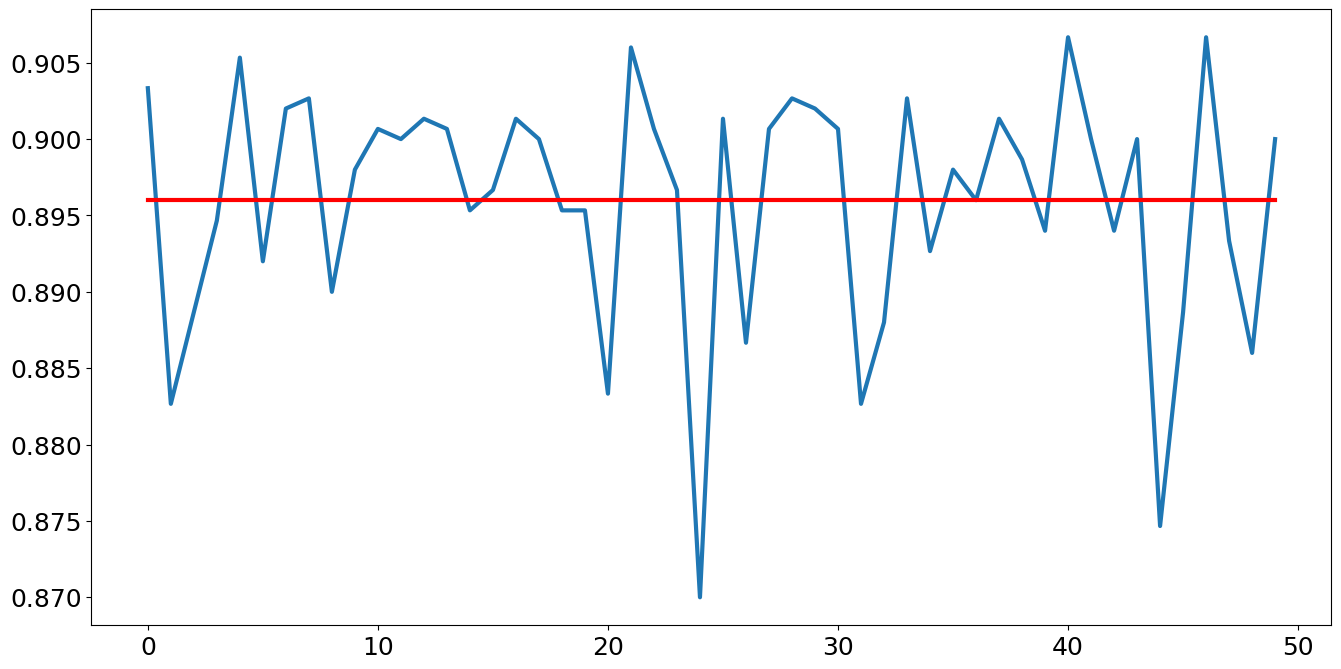

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"]=(16,8) 
plt.plot(perf, linewidth=3)
plt.plot(avg_perf, 'r', linewidth=3)

In [68]:
import joblib
from onnxmltools import convert_sklearn

onnx_model = convert_sklearn(ctree_final, 'ONNXmodel', initial_types=input_types)

TypeError: Unexpected type for variable raw_name='Age', type=<class 'str'>.

In [58]:
import pickle
pickle.dump(ctree_final, open('Bank_Cust_Pred_Ctree_16_jul.pk', 'wb'))

In [59]:
import joblib

loaded_model = joblib.load('Bank_Cust_Pred_Ctree_16_jul.pk')

In [ ]:
from onnxmltools import convert_sklearn

onnx_model = convert_sklearn(loaded_model, 'ONNXmodel')

with open('/home/andre/IMD/Dell/Personal_loan_prediction/Bank_Cust_Pred_Ctree.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())